### Import Necessary Libraries

In [1]:
# import needed libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

### Load the dataset

In [2]:
# load data
who_df = pd.read_csv('who_data.csv')

# print the first 10 of dataset
who_df.head(10)

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
# check the number of entries and features
who_df.shape

(32561, 15)

In [4]:
# check data information
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

All features are in their appropriate data type, there are 15 columns and 32561 rows in this dataset and there are no null values

In [5]:
# check for duplicate
who_df.duplicated().sum()

24

In [6]:
# drop duplicate rows
who_df = who_df.drop_duplicates()

In [7]:
# sanity check for duplicates
who_df.duplicated().sum()

0

In [8]:
# sanity check for presence of null values
who_df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

In [9]:
# statistical evaluation of dataset
who_df.describe()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


The mean of both capital loss and gain in comparison to the median (50%), shows there is presence but outlier but this is normal as this dataset shows that majority of people don't invest and a few people do and that makes them have value that is out of range as the max, making it become an outlier, while other variables have similar median and mean which deplicts even distribution

### Workclass Column

In [10]:
# check for inconsistencies in the workclass column
who_df['workclass'].value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

there is a question mark in the workclass column that needs to be cleaned

In [11]:
# replace ? with Unknown
who_df['workclass'].replace(' ?', 'Unknown', inplace = True)

In [12]:
# sanity check
who_df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', 'Unknown', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
who_df['workclass'].describe()

count        32537
unique           9
top        Private
freq         22673
Name: workclass, dtype: object

### Education Column

In [14]:
# check for inconsistencies in the education column
who_df['education'].value_counts()

 HS-grad         10494
 Some-college     7282
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: education, dtype: int64

There are no incosistencies in the education column

### Marital Status Column

In [15]:
# check for inconsistencies in the marital_status column
who_df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

There are no incosistencies in the marital_status column

### Occupation Column

In [16]:
# check for inconsistencies in the occupation column
who_df['occupation'].value_counts()

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: occupation, dtype: int64

there is a question mark in the occupation column that needs to be cleaned

In [17]:
# replace ? with unknown
who_df['occupation'].replace(' ?', 'Unknown', inplace = True)

In [18]:
# sanity check
who_df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', 'Unknown', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

### Feature Engineering for Occupation

In [19]:
# def a function for feature engineering
def create_class_column(df, column_name, threshold):
    # get the value count of the input column
    val_c = df[column_name].value_counts()

    # filter the input column to only those with at least `threshold` occurrence
    class_list = val_c[val_c.values >= threshold].index.tolist()

    class_val = []

    for i in range(df.shape[0]):  # iterate over all rows in data
        txt = df[column_name].values[i]  # getting the values in input column
        flag = 0  # flag variable
        for item in class_list:  # iterate over the list of classes considered
            if item in txt and flag == 0:  # checking if class name is in the row
                class_val.append(item)
                flag = 1
        if flag == 0:  # if the row values is different from the list of classes considered
            class_val.append("Others")

    df[f"{column_name}_class"] = class_val
    # creating a new column from an existing column - feature encoding
    return df

In [20]:
# call function to class the various entries into groups
who_df = create_class_column(who_df, "occupation", 2000)

In [21]:
# check value counts of the engineered feature
who_df['occupation_class'].value_counts()

Others                7533
 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3768
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
Name: occupation_class, dtype: int64

### Relationship Column

In [22]:
# check for inconsistencies in the relationship column
who_df['relationship'].value_counts()

 Husband           13187
 Not-in-family      8292
 Own-child          5064
 Unmarried          3445
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

There are no incosistencies in the relationship column

### Race Column 

In [23]:
# check for inconsistencies in the race column
who_df['race'].value_counts()

 White                 27795
 Black                  3122
 Asian-Pac-Islander     1038
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

There are no incosistencies in the race column

### Sex Column 

In [24]:
# check for inconsistencies in the sex column
who_df['sex'].value_counts()

 Male      21775
 Female    10762
Name: sex, dtype: int64

There are no incosistencies in the sex column

### Native Country Column

In [25]:
# check for inconsistencies in the native_country column
who_df['native_country'].value_counts()

 United-States                 29153
 Mexico                          639
 ?                               582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

there are question mark entries in the native_country column that needs to be cleaned

In [26]:
# replace ? with Unknown
who_df['native_country'].replace(' ?', 'Unknown', inplace = True)

In [27]:
# sanity check
who_df['native_country'].value_counts()

 United-States                 29153
 Mexico                          639
Unknown                          582
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Japan                            62
 Guatemala                        62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

### Feature engineering for native country

In [28]:
who_df = create_class_column(who_df, "native_country", 2000)

In [29]:
who_df['native_country_class'].value_counts()

 United-States    29153
Others             3384
Name: native_country_class, dtype: int64

### Salary Column 

In [30]:
# check for inconsistencies in the salary column
who_df['salary'].value_counts()

 <=50K    24698
 >50K      7839
Name: salary, dtype: int64

There are no incosistencies in the sex column

### More Exploration

In [31]:
print('There are', len(who_df[(who_df['working_hours_per_week'] >= 50) & (who_df['salary'] == ' <=50K')]),'who work for 50 hours and more in a week but earn 50k and less yearly')


There are 3679 who work for 50 hours and more in a week but earn 50k and less yearly


In [32]:
print('There are', len(who_df[(who_df['working_hours_per_week'] >= 50) & (who_df['salary'] == ' >50K')]), 'who work for 50 hours and more in a week and earn greater than 50k yearly')

There are 2780 who work for 50 hours and more in a week and earn greater than 50k yearly


In [33]:
print('There are', len(who_df[(who_df['working_hours_per_week'] < 50) & (who_df['salary'] == ' >50K')]), 'who work for less than 50 hours and more in a week and earn greater than 50k yearly')

There are 5059 who work for less than 50 hours and more in a week and earn greater than 50k yearly


In [34]:
print('There are', len(who_df[(who_df['working_hours_per_week'] < 50) & (who_df['salary'] == ' <=50K')]), 'who work for less than 50 hours in a week and earn 50k or less yearly')

There are 21019 who work for less than 50 hours in a week and earn 50k or less yearly


In [35]:
print('There are', len(who_df[(who_df['marital_status'] == ' Never-married') & (who_df['salary'] == ' >50K')]), 'who are yet to get marrired and earn more than 50k')

There are 491 who are yet to get marrired and earn more than 50k


### Visualize dataset: Bivariate Plot

<AxesSubplot: xlabel='salary', ylabel='working_hours_per_week'>

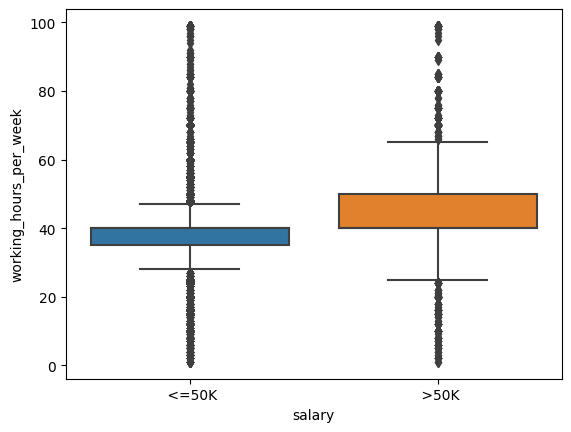

In [36]:
# bivariate visualization of salary and working hours per week
sns.boxplot(data = who_df, x = "salary", y = 'working_hours_per_week')

People who earn more than 50k dollars a year work more hours compared to those who earn less

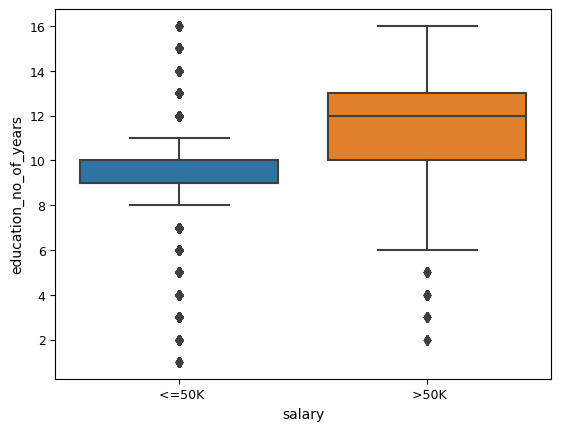

In [37]:
# bivariate visualization of salary and education_no_of years

sns.boxplot(data = who_df, x= "salary", y = 'education_no_of_years')

plt.tick_params(labelsize=9) 

People who earn more than 50k dollars a year work have higher number of education years compared to those who earn less

### Univariate Plot

In [38]:
from utils import labeled_barplots

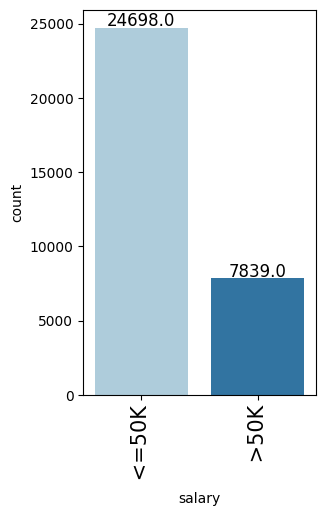

In [39]:
# Call funtion to view the salary column in a barplot

labeled_barplots(data = who_df, feature = 'salary')

There are more individuals who earn less than 50k in this dataset, which a total number of 24698 people

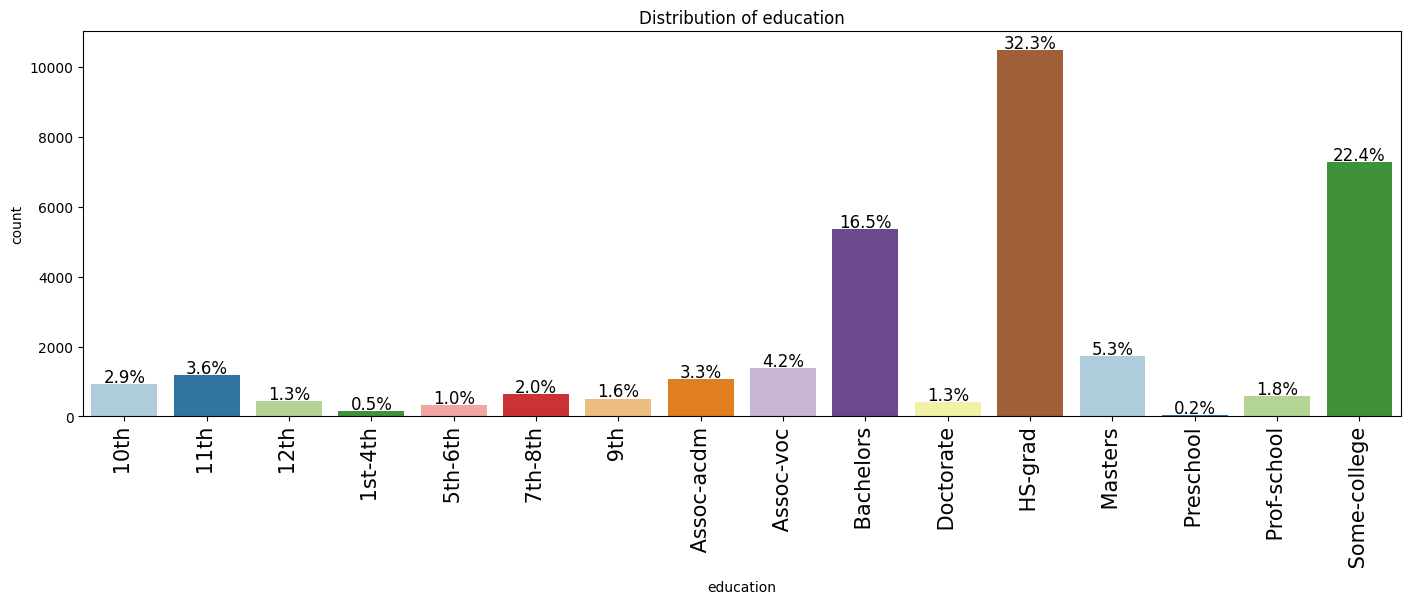

In [40]:
# Display education distribution
labeled_barplots(data = who_df, feature = 'education', perc = True, title = 'Distribution of education')

There are more people who are High school graduate in this dataset and the second leading is the some-college category

### Check the Distribution of Dataset

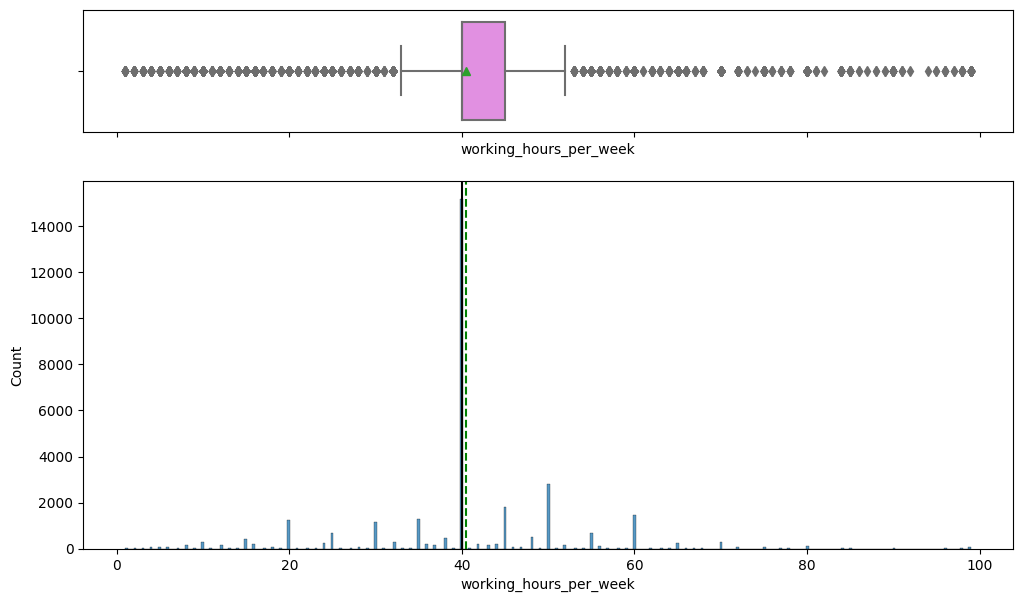

In [41]:
from utils import histogram_boxplot
histogram_boxplot(data =who_df, feature = 'working_hours_per_week')

The distribution of this dataset is even and not skewed as the mean and median are close

In [42]:
# checking the proportion of the 2 classes in the target variable
who_df['salary'].value_counts(normalize = True)

 <=50K    0.759074
 >50K     0.240926
Name: salary, dtype: float64

### Checking for outliers

In [43]:
numeric_who_df = who_df.select_dtypes(include = 'number')

<function matplotlib.pyplot.show(close=None, block=None)>

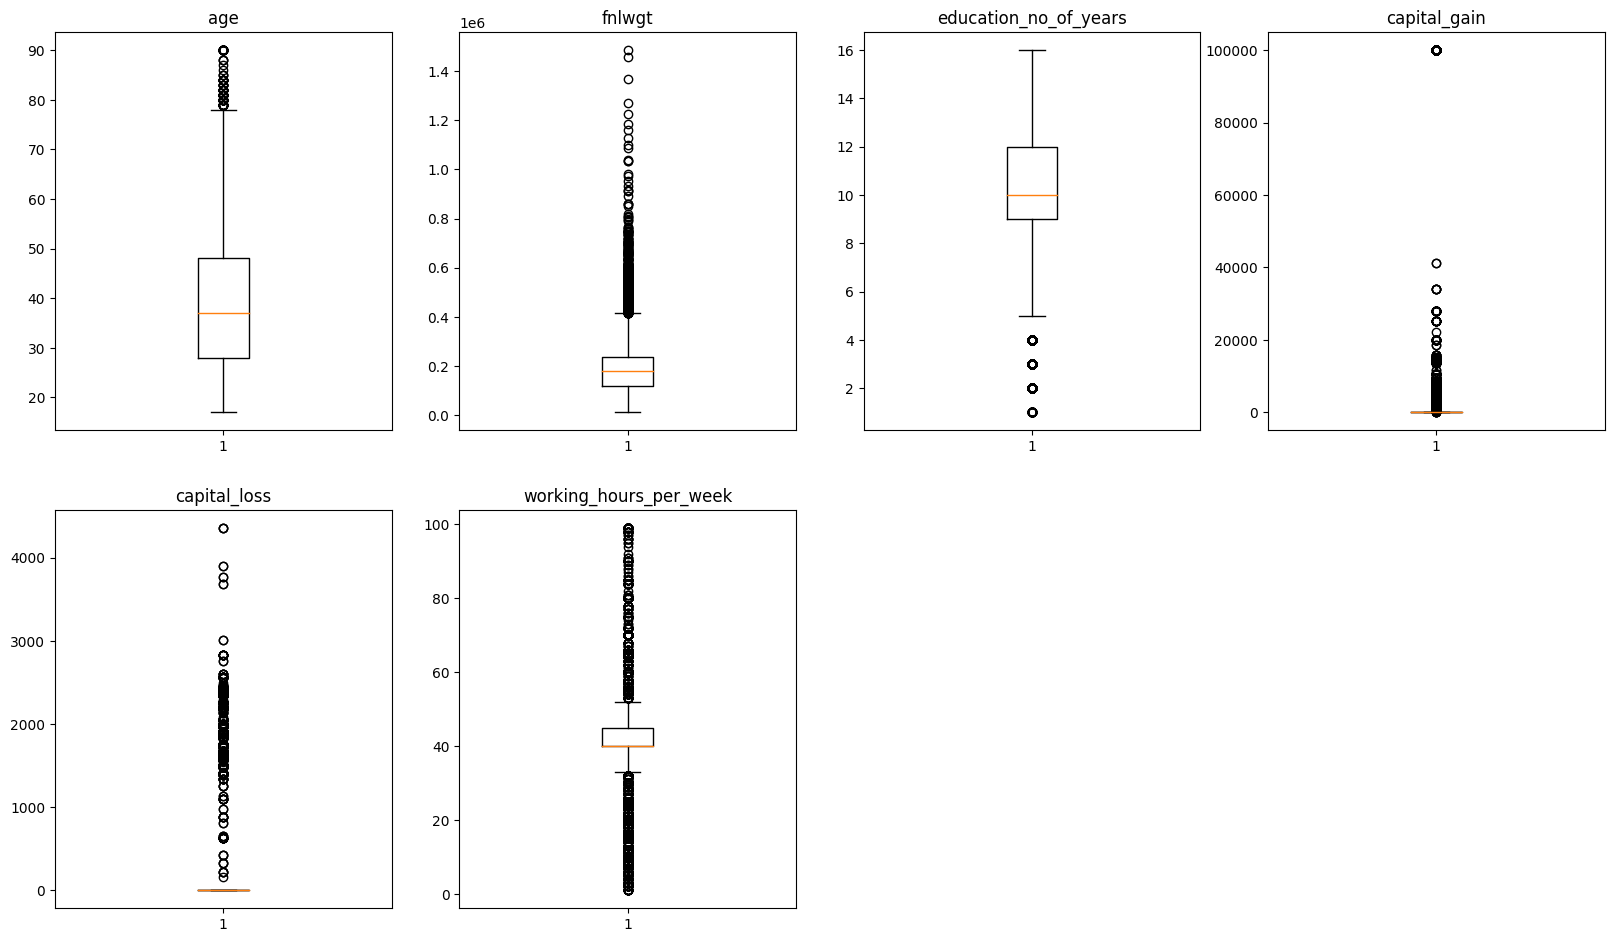

In [44]:
# outlier detection using boxplot
plt.figure(figsize = (20, 30))

for i, variable in enumerate(numeric_who_df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(numeric_who_df[variable])
    plt.title(variable)
plt.show

### Treating the ouliers

In [45]:
# define a function to treat outliers
def treat_outliers(video_game, col):
    '''
    treat outliers in variable
    col: str, name of the numerical variable
    video_game: dataframe
    '''
    
    Q1 = video_game[col].quantile(0.25) #25th percentile
    Q3 = video_game[col].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1
    
    lower_whisker = Q1 - (1.5 * IQR)
    upper_whisker = Q3 + (1.5 * IQR)
    video_game[col] = np.clip(video_game[col], lower_whisker, upper_whisker)
    return video_game


def treat_outliers_all(video_game, col_list):
    for c in col_list:
        video_game = treat_outliers(video_game, c)
    return video_game

In [46]:
who_df = treat_outliers_all(who_df, numeric_who_df)

<function matplotlib.pyplot.show(close=None, block=None)>

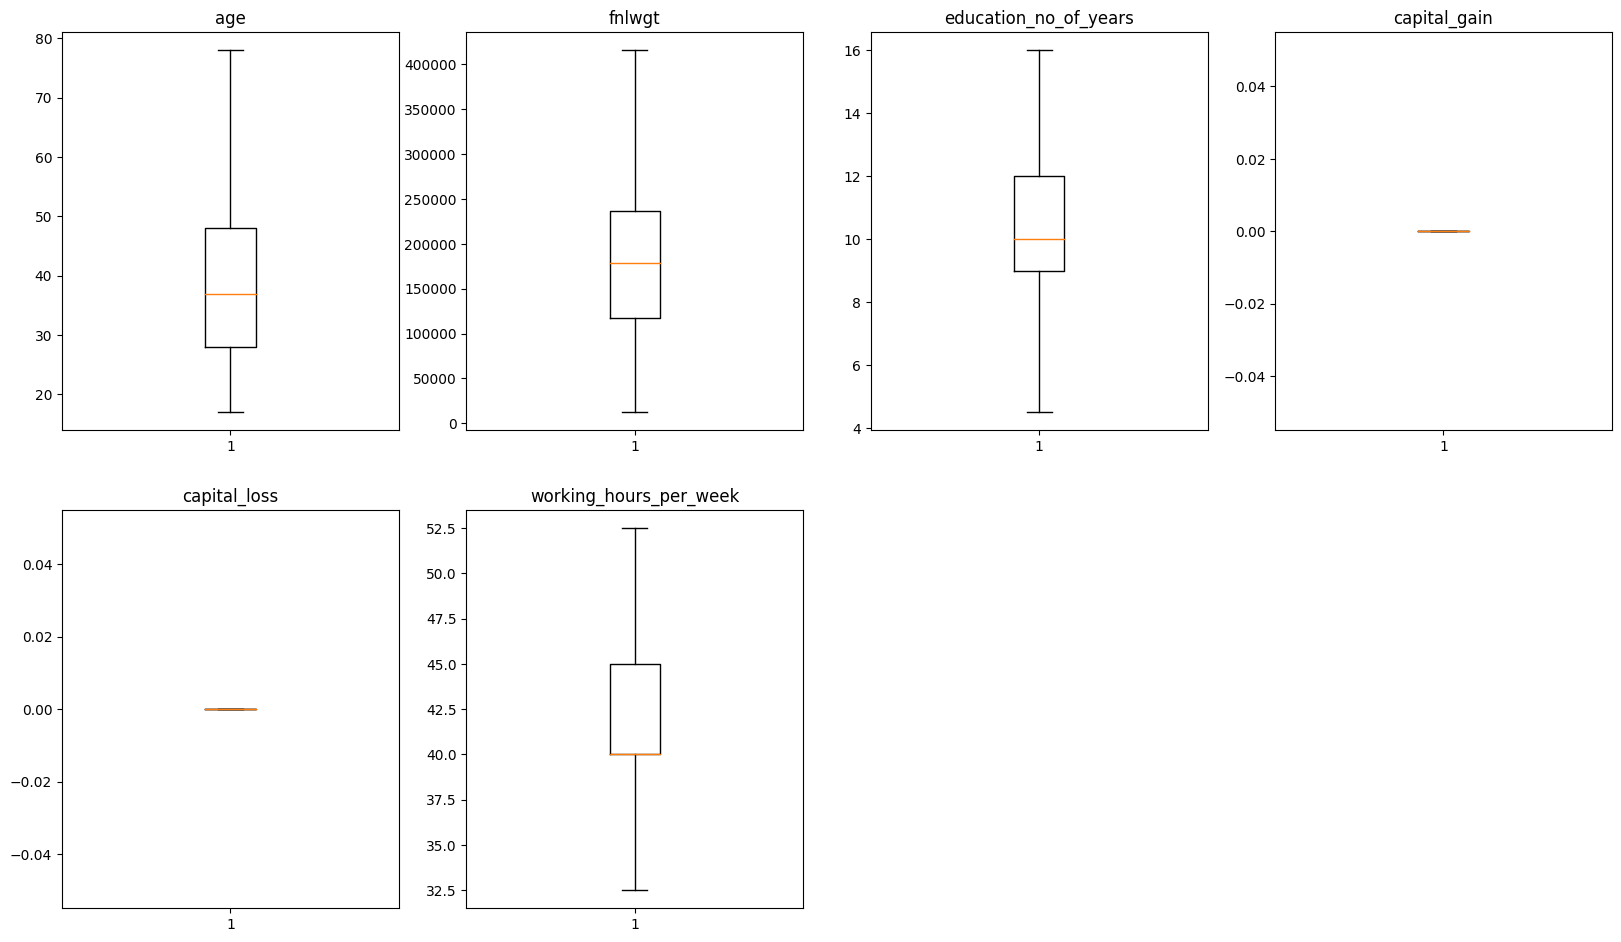

In [47]:
# sanity chack for the presence of outlier using boxplot
plt.figure(figsize = (20, 30))

for i, variable in enumerate(numeric_who_df):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(who_df[variable], whis = 1.5)
    plt.title(variable)
plt.show

### Check Correlation

<AxesSubplot: >

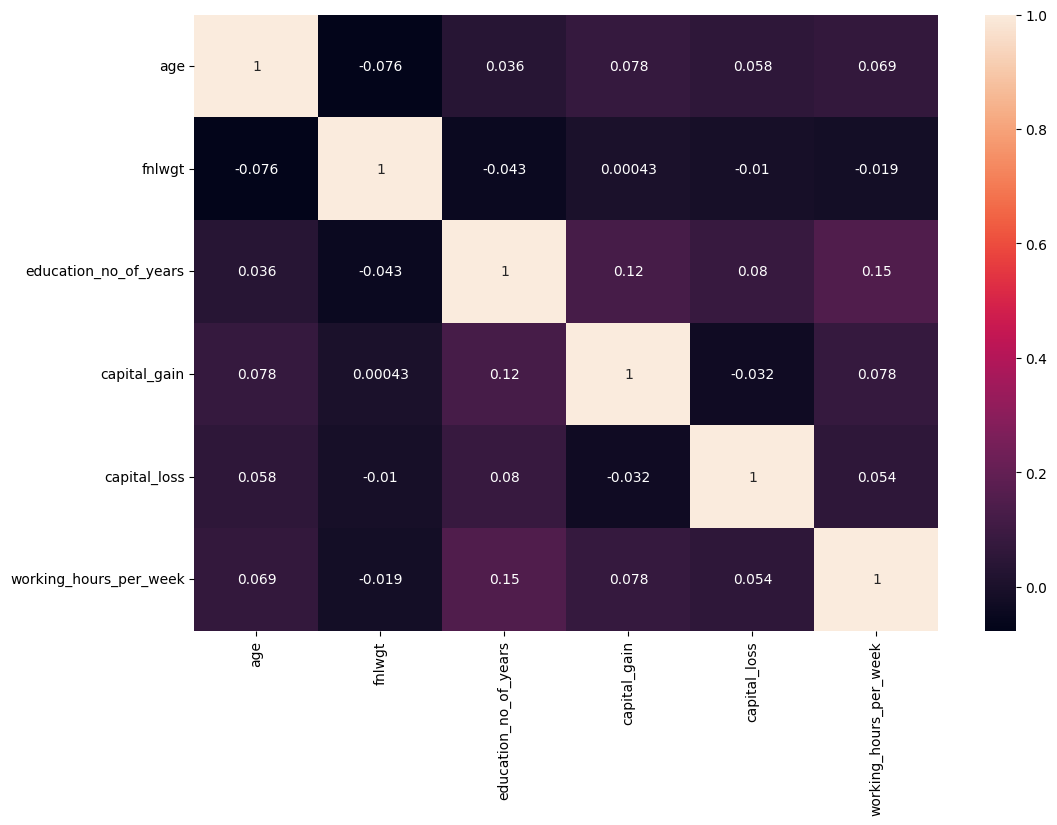

In [48]:
# check for correlation
who_df_corr = numeric_who_df.corr()

plt.figure(figsize = (12, 8))
sns.heatmap(who_df_corr, annot = True)

There is little correlation between capital gain and education_no_Of_years, working_hours_per_week and education_no_Of_years. Other than these, generally the variables here are random to each other

### Split the data

In [49]:
# drop columns that are not need and are duplicate
X = who_df.drop(labels=['salary', 'occupation', 'native_country'], axis=1)
y = who_df['salary']

In [50]:
# encode the categorical variable
X = pd.get_dummies(X, drop_first= True)
X.head()

,age,fnlwgt,education_no_of_years,capital_gain,capital_loss,working_hours_per_week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,race_ White,sex_ Male,occupation_class_ Craft-repair,occupation_class_ Exec-managerial,occupation_class_ Machine-op-inspct,occupation_class_ Other-service,occupation_class_ Prof-specialty,occupation_class_ Sales,occupation_class_Others,native_country_class_Others
0,39,77516,13.0,0,0,40.0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
1,50,83311,13.0,0,0,32.5,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
2,38,215646,9.0,0,0,40.0,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,53,234721,7.0,0,0,40.0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,28,338409,13.0,0,0,40.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [51]:
# split data into 80 and 20, using stratify to maintain the proportion in each set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y)

In [52]:
from sklearn.preprocessing import LabelEncoder

# create an instance of LabelEncoder
le = LabelEncoder()

# fit the encoder on the categorical data
y_train_cat = le.fit_transform(y_train)

# transform the categorical data into numerical data
y_test_cat = le.transform(y_test)

In [53]:
y_train_cat

array([0, 0, 1, ..., 0, 0, 1])

### Check Split the data to see if proportion is maintained

In [54]:
# for training dataset
y_train.value_counts(normalize = True)

 <=50K    0.759076
 >50K     0.240924
Name: salary, dtype: float64

In [55]:
# for test dataset
y_test.value_counts(normalize = True)

 <=50K    0.759066
 >50K     0.240934
Name: salary, dtype: float64

we see that both the training set and set test maintained the proportion of the categories of the target in both training and testing. This is the aim of stratify for imbalanced data in classification

### Build the logistic regression model

In [56]:
'''
import library to normalise dataset
'''
from sklearn.preprocessing import MinMaxScaler

# create an instance
scaler = MinMaxScaler()


x_train_sd = scaler.fit_transform(x_train)
x_test_sd = scaler.transform(x_test)

In [57]:
# build the model
from sklearn.linear_model import LogisticRegression

# crate an instance
logistic_reg = LogisticRegression(random_state= 0 )
'''
There is also a way to combat imbalanced data with logistic regression by setting the class weight 
i.e pay 90% attention to the less frequent class and pay just 10% attention to the more frequent class
'''

logistic_reg.fit(x_train_sd, y_train_cat)

C:\Users\USER1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [58]:
# check the accuracy score
logistic_reg.score(x_train_sd, y_train_cat)

0.8325713627108225

### Make predictions using the proba method

In [59]:
logistic_reg.predict_proba(x_test_sd)

array([[0.29146584, 0.70853416],
       [0.18116819, 0.81883181],
       [0.96624319, 0.03375681],
       ...,
       [0.92756447, 0.07243553],
       [0.90687701, 0.09312299],
       [0.75825045, 0.24174955]])

### Check model performance

In [60]:
def model_performance_classification(model, predictors, target, threshold = 0.5):
    # the higher the threshold, the higher the bar you are raising for the model i.e you want the model to be very precise
    '''
    Function to compute different metrics to check regression model performance
    
    model:classifier
    predictors: independent variables
    target: dependent variables
    '''
    
    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)
    recall = recall_score(target, pred_class) # to compute recall
    
    precision = precision_score(target, pred_class) # to compute precision
    f1 = f1_score(target, pred_class) # to compute F1 score
    
    # craeting a dataframe of metrics
    df_performance = pd.DataFrame(
    {
        'Accuracy': acc,
        'Recall': recall,
        'Precision': precision,
        'F1_score': f1
    },
    index = [0])
    
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize = (8,5))
    sns.heatmap(conf, annot = True, fmt = 'g')
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show
    
    return df_performance

### Model performance on the trainig set

,Accuracy,Recall,Precision,F1_score
0,0.832571,0.542178,0.695723,0.609428


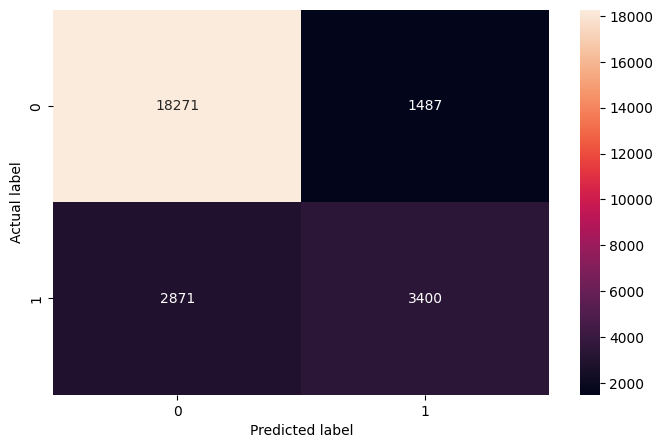

In [61]:
logistic_reg_train = model_performance_classification(logistic_reg, x_train_sd, y_train_cat)
logistic_reg_train

Here the model is getting it correctly on the 18247(True Negative - TN) and 3420(True Positive - TP) diagonal. 
- The model correctly predicted that 18247 people are earning less than 50k yearly and 3420 are earning more than 50k yearly 
- The other diagonal is where the model is making mistake i.e wrongly predicting that 1511(False Positive - FP) people who earn more than 50k yearly, whereas they dont.
- lastly 2851(False Negative)people are wrongly classified as those who earn less than 50k and they don't.
#### Precision score measure
- Out of the people the model predicted to earn more than 50k yearly, the model got 69% correctly
#### Recall score measure
- Out of the people who earn more in the dataset, the model got 54% correctly
Seeing that we are about and concerned with changing the lives of individuals in underprivileged sections of society, so we would want to know with more accuracy the people who already have improved lives and earn more so that we know the other set of people are the ones we want to help, and by this we will make sure to reduce the number of people that the moel predicts as earning less than 50k when they earn more (False Positive - 1511). we do this by increasing the threshold.
#### But before that we will try the model on the test set to see it's performance because the training evaluation of this model is already poor

### Model performance on the test set

,Accuracy,Recall,Precision,F1_score
0,0.834511,0.564413,0.691947,0.621707


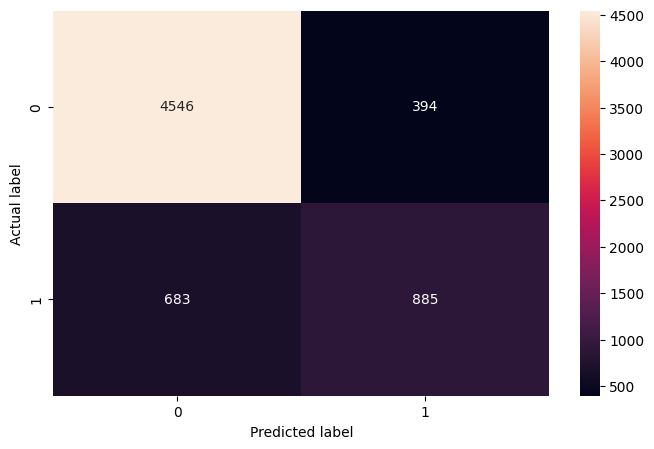

In [62]:
# for the test
logistic_reg_test = model_performance_classification(logistic_reg, x_test_sd, y_test_cat)
logistic_reg_test

Although accuracy is high but the f1 score which is a fine balance between the recall and precision score is 61% which is poor and the confusion matrix shows that there is high misclassification in the area of precision and recall, and this could be as a result of the data being imbalanced. So let's Improve the model first.

### Improve the model by balancing the dataset using SMOTE

In [63]:
!pip install imblearn


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
# instantiate the smote
smote = SMOTE(random_state=0)

X_sm, y_sm = smote.fit_resample(X, y)

In [66]:
y_sm.value_counts(normalize = True)

 <=50K    0.5
 >50K     0.5
Name: salary, dtype: float64

Now we can split the data now seeing the data is balanced

In [67]:
# split data
x_train_sm, x_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size= 0.2) # no need for the strtify cause the data is balanced

In [68]:
# fit the encoder on the categorical data
y_train_cat_sm = le.fit_transform(y_train_sm)

# transform the categorical data into numerical data
y_test_cat_sm = le.transform(y_test_sm)

In [69]:
# normalizing the data
x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_test_sm_sd = scaler.transform(x_test_sm)

### Build the model with the balanced data

In [70]:
# build model

# crate an instance of model
logistic_reg2 = LogisticRegression(random_state= 0) # multi_class = multinomial

# pass in the 
logistic_reg2.fit(x_train_sm_sd, y_train_cat_sm)

C:\Users\USER1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

### Check performance of training dataset

,Accuracy,Recall,Precision,F1_score
0,0.883895,0.867199,0.897331,0.882008


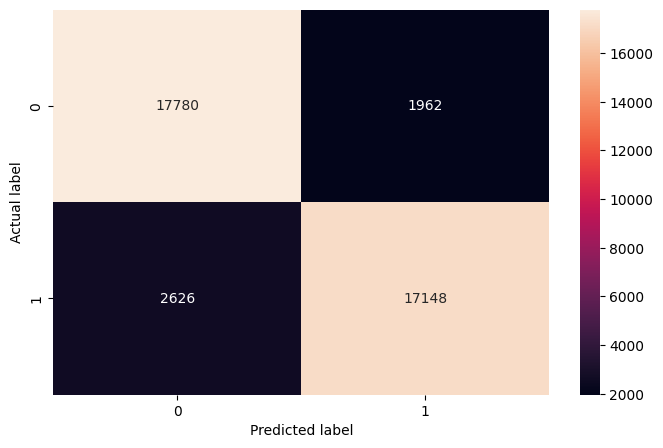

In [71]:
logistic_reg2_train = model_performance_classification(logistic_reg2, x_train_sm_sd, y_train_cat_sm)
logistic_reg2_train

### Check performance of testing dataset

,Accuracy,Recall,Precision,F1_score
0,0.881781,0.860479,0.89805,0.878863


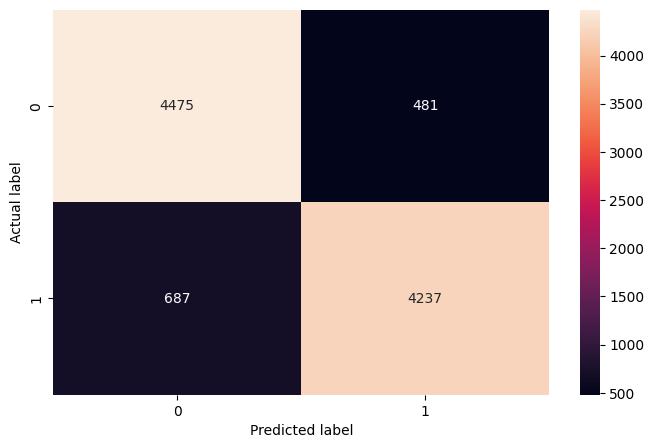

In [72]:
# for test using smote
logistic_reg2_test = model_performance_classification(logistic_reg2, x_test_sm_sd, y_test_cat_sm)
logistic_reg2_test

The performance of the logististic regression model on the balanced data significantly improved, where we have the model giving correct prediction of 89% out of the prediction it made about the individuals who earn more and so we can now improve the model by increasing the threshold to reduced the False Positive(individual the model classify as people who earn less when they actually earn more) as suggested initially.

### Improve the precision score by increasing the threshold
### Check performance of training dataset

,Accuracy,Recall,Precision,F1_score
0,0.853907,0.727218,0.974321,0.832827


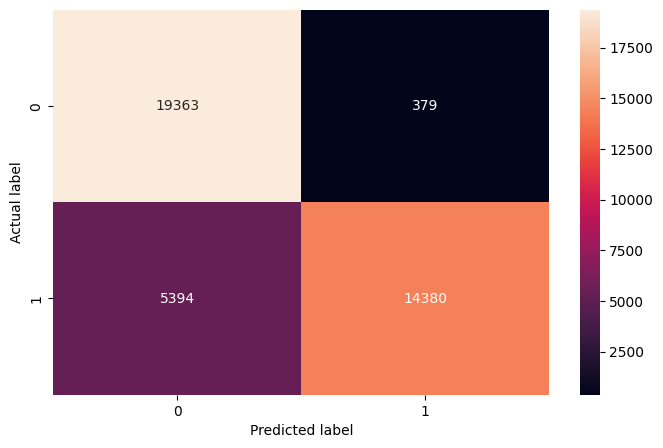

In [73]:
# check the performance on the train
logistic_reg_threshold_train = model_performance_classification(logistic_reg2, x_train_sm_sd, y_train_cat_sm, threshold= 0.8)
logistic_reg_threshold_train

the model now predicts more accurately 97% of the people who earn more as we desired, lets check the test to see it's performance

### Check performance of testing dataset

,Accuracy,Recall,Precision,F1_score
0,0.855364,0.728067,0.97551,0.833818


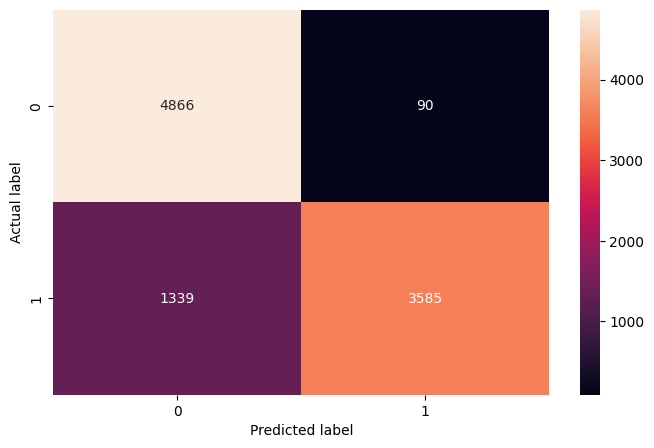

In [74]:
# check performance onthe testing
logistic_reg_threshold_test = model_performance_classification(logistic_reg2, x_test_sm_sd, y_test_cat_sm, threshold= 0.8)
logistic_reg_threshold_test

- The model correctly predicted that 4866 people are earning less than 50k yearly and 3585 are earning more than 50k yearly
- The other diagonal is where the model is making mistake i.e wrongly predicting that 90(False Positive - FP) people who earn more than 50k yearly, whereas they dont.
- lastly 1339(False Negative)people are wrongly classified as those who earn less than 50k meanwhile they earn more.
#### Precision score measure
- The precision has increased because of the hyperparameter tuning of the threshold, so out of the people the model predicted to earn more than 50k yearly, the model got 97% correctly for both the training and test set
#### Recall score measure
- Out of the people who earn more in the dataset, the model got 72% correctly.
  So far i am pleased with this model as it meets the kpi of the government but Lets see if the model's performance will improve using a different model like the decision tree

### Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify = y)

In [77]:
# fit the encoder on the categorical data
y_train_cat = le.fit_transform(y_train)

# transform the categorical data into numerical data
y_test_cat = le.transform(y_test)

In [78]:
dec_tree = DecisionTreeClassifier(random_state=0)

dec_tree.fit(x_train, y_train_cat)

DecisionTreeClassifier(random_state=0)

In [79]:
# training accuracy in Decison tree
# accuracy i.e prediction
pred_train_dec = dec_tree.predict(x_train)

acc_train_dec = accuracy_score(y_train_cat, pred_train_dec)
acc_train_dec

0.9998847439394521

99% this is saying that the model is a performing excellently well. This is definitely overfitting

In [80]:
# testing accuracy in Decison tree
# accuracy i.e prediction
pred_test_dec = dec_tree.predict(x_test)

acc_test_dec = accuracy_score(y_test_cat, pred_test_dec)
acc_test_dec

0.7748924400737554

This model is overfitting because it's saying it is a perfect model on the training

In [81]:
#using recall score
rec_train_dec = recall_score(y_train_cat, pred_train_dec)

rec_test_dec = recall_score(y_test_cat, pred_test_dec)

In [82]:
print(rec_train_dec)
print(rec_test_dec)

0.9995216073991389
0.5350765306122449


on the training the recall is 99% but on the testing it is 55%.. this is overfitting

### Using a balanced dataset and controlling the complexity of the tree by tuning the max_depth hyperparameters to get an improved performance

In [83]:
dec_tree4 = DecisionTreeClassifier(random_state=0, max_depth = 4)

dec_tree4.fit(x_train_sm, y_train_cat_sm)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [84]:
from utils import model_performance_class

,Accuracy,Recall,Precision,F1_score
0,0.831587,0.839082,0.826913,0.832953


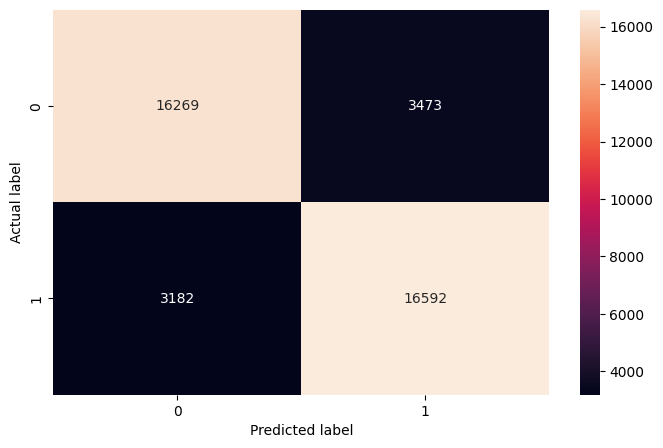

In [85]:
# evaluation for the training
dec_tree4_train = model_performance_class(dec_tree4, x_train_sm, y_train_cat_sm)
dec_tree4_train

By pre pruning the model has learnt better with precision of 82% and recall score of 83% and not cramming the data and it should improve on the test set, however the logistic regression has a better performance

,Accuracy,Recall,Precision,F1_score
0,0.838664,0.840171,0.836772,0.838468


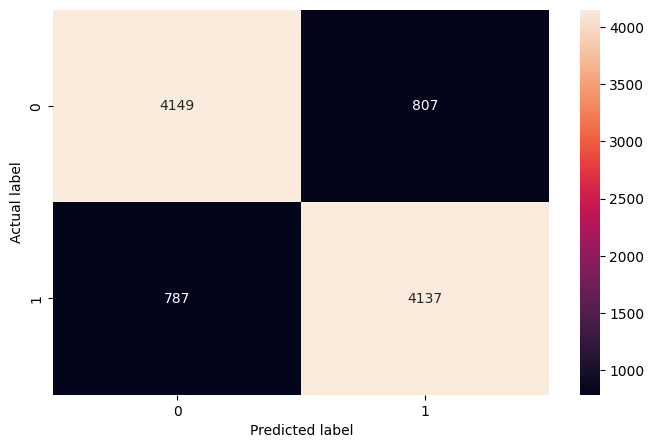

In [86]:
# check performance for the test set
dec_tree4_test = model_performance_class(dec_tree4, x_test_sm, y_test_cat_sm)
dec_tree4_test

The decision tree model with the max depth of 4 improved on the test data set and it can be said of the model that it is genralizing well. In comparison to The logistic regression model, the logistic model performs better with a similar f1 score percent of 83% and higher precision of 97% that suits the kpi of the job and should be used for this project

### Visualize The Tree

In [87]:
# one way to beautify the tree we want to visualize is using the package called pydotplus
!pip install pydotplus

"""
create the tree with the help pydotplus, if we use just the default called plottree
package, it will not show the name of the variablebu their index
"""
import pydotplus
from IPython.display import Image


[notice] A new release of pip is available: 23.0 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### Create a dot data from the tree

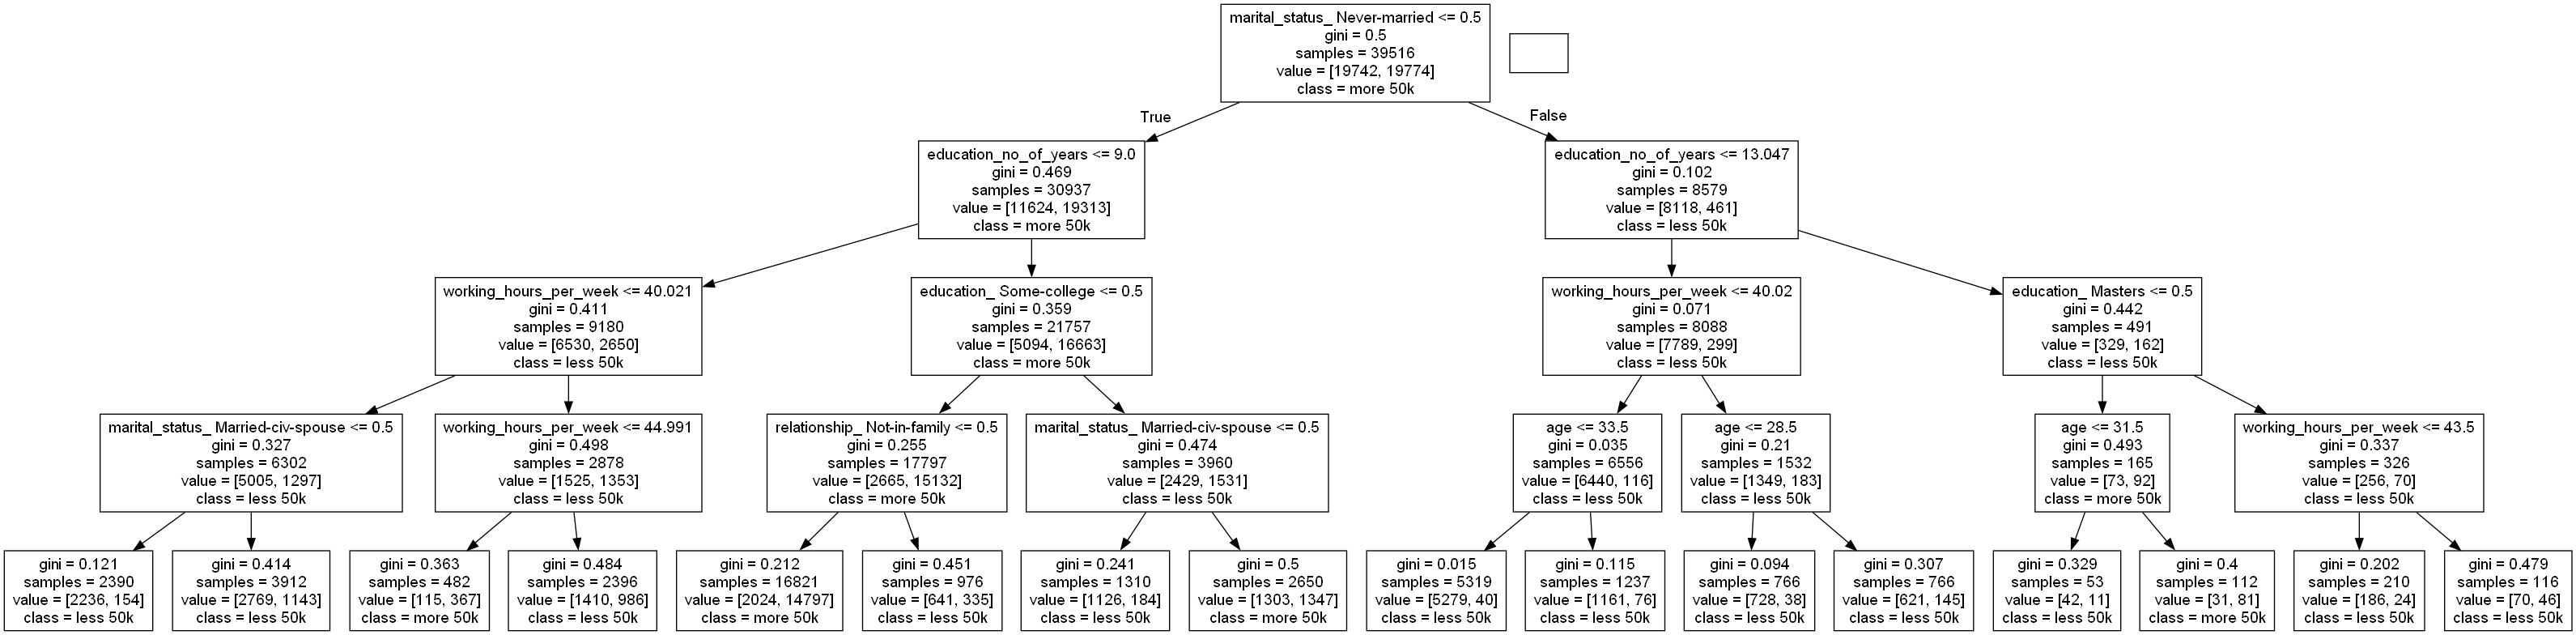

In [88]:
dot_data = tree.export_graphviz(dec_tree4, out_file = None, feature_names = X.columns,
                               class_names=["less 50k","more 50k"])

# create a graph from the dot data
graph = pydotplus.graph_from_dot_data(dot_data)

# create the tree image from the graph
Image(graph.create_png())

### Feature Importances

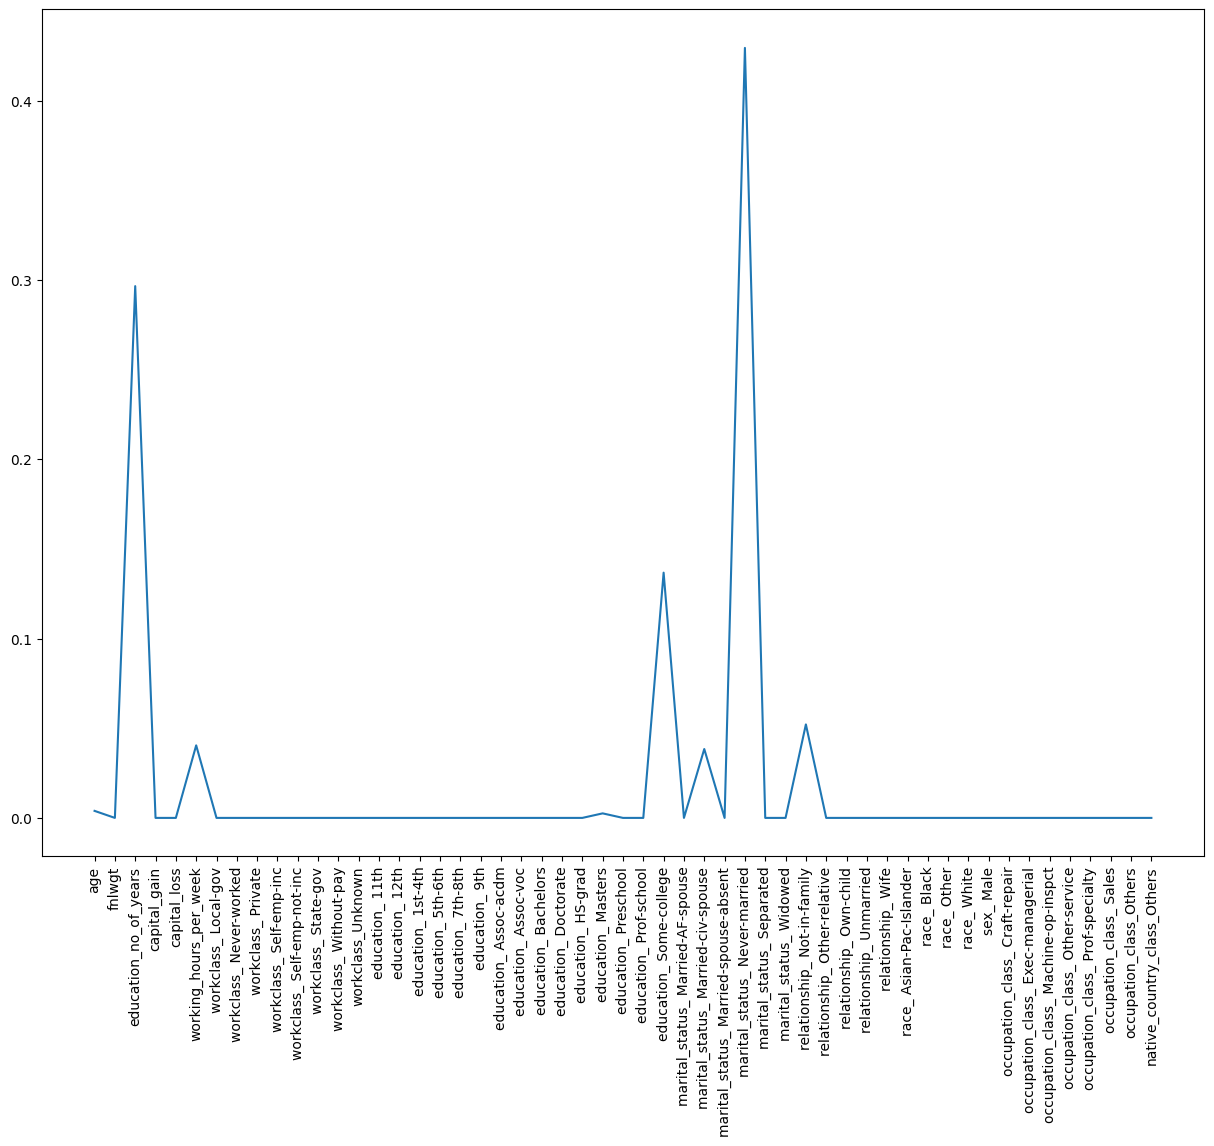

In [89]:
#Import the feature importance function: check the contribution of each variable to the prediction of the target

plt.figure(figsize=(15,11))
# pass in the best module
plt.plot(dec_tree4.feature_importances_)
plt.xticks(range(X.shape[1]), X.columns, rotation = 90)
plt.show()

We have 3 highest important contributing features which are the marital status(never married) as the highest, education number of years and thirdly education_some_college. 
### Answer To The Problem
The model insists that the following is responsible for or influences the income of an individual 
1. People who have never been married
2. The number of education years 
3. Some College

### Predictive model for income and the performance assessment 
- The best predictive model is the logistic model and the performance assessment is the Precision because we are able to narrow down to the objective as to why we are carry out this prediction which is improving the lives of the people in the underprivilege section and the logistic model allows us to get the higher percentage of the precision score i.e it help get 97% more accurately the people who earn more so as to focus on those who earn less

### Actionable Insights & Recommendations
- I dont think the government should advice or make policies that people should not get married but can propagated that the single people should make the most of their single years to strive to earn more
- If possible they should make provision for free education or encourage educating the people in the underprivilege section as we see that the more the number of years spent on education the more chances of earning higher than 50,000 dollars a year and also getting to college which can also increases the chances of individual to earn more